In [ ]:
https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [58]:
print("결측치 확인:\n", df.isnull().sum())
df.dropna(inplace=True)

결측치 확인:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [59]:
# 'Outcome' 컬럼 제거 (회귀 문제로 변경)
df.drop(columns=['Outcome'], inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [60]:
# X(입력 변수), y(타겟 변수: BMI) 설정
X = df.drop('BMI', axis=1)  # 'BMI'를 예측해야 하므로 제거
y = df['BMI']  # 'BMI'를 타겟(레이블)으로 설정

In [61]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# StandardScaler 적용 (트리 모델 제외)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(614, 7) (614,)
(154, 7) (154,)


In [62]:
# 결정 트리
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("DT MSE:", mean_squared_error(y_test, dt_preds))

DT MSE: 97.62506493506493


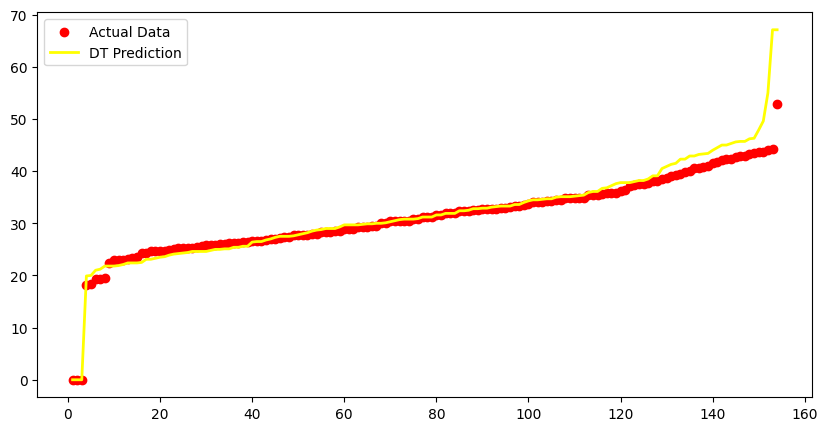

In [63]:
# DT 시각화: 실제값 vs 예측값
plt.figure(figsize=(10, 5))
plt.scatter(range(1, y_test.shape[0]+1), sorted(y_test), color='red', label="Actual Data")
plt.plot(range(1, y_test.shape[0]+1), sorted(dt_preds), color='yellow', linewidth=2, label="DT Prediction")
plt.legend()
plt.show()

In [64]:
# 랜덤 포레스트
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("RF MSE:", mean_squared_error(y_test, rf_preds))

RF MSE: 48.78337693506496


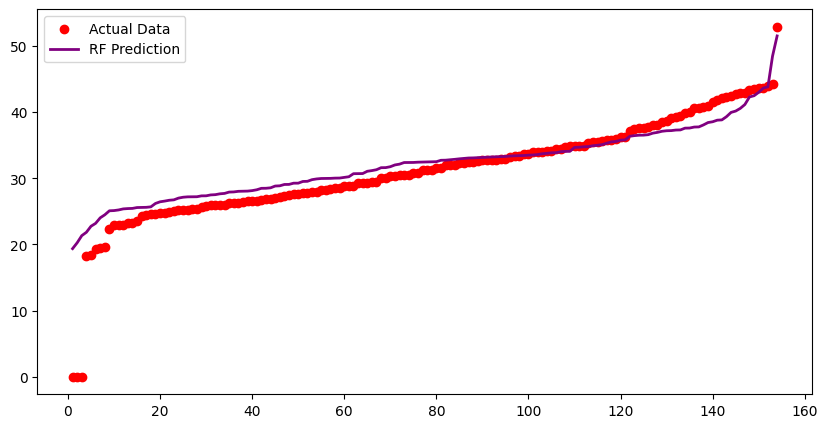

In [65]:
# RF 시각화: 실제값 vs 예측값
plt.figure(figsize=(10, 5))
plt.scatter(range(1, y_test.shape[0]+1), sorted(y_test), color='red', label="Actual Data")
plt.plot(range(1, y_test.shape[0]+1), sorted(rf_preds), color='purple', linewidth=2, label="RF Prediction")
plt.legend()
plt.show()

In [66]:
# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print("SVR MSE:", mean_squared_error(y_test, svr_preds))

SVR MSE: 49.87870996805965


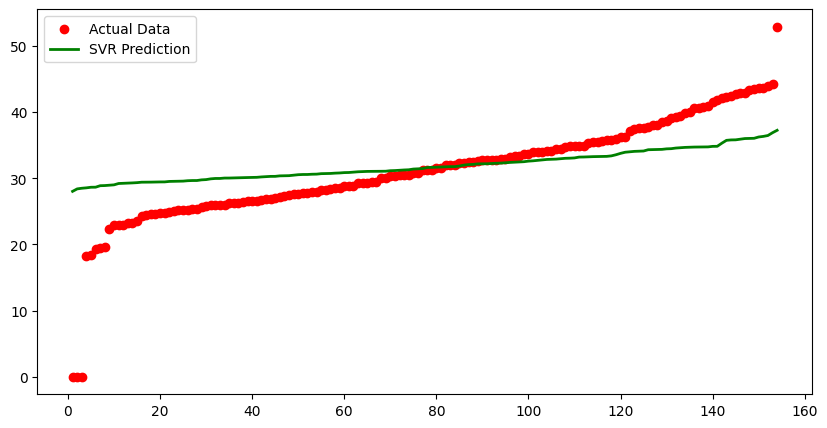

In [67]:
# SVR 시각화: 실제값 vs 예측값
plt.figure(figsize=(10, 5))
plt.scatter(range(1, y_test.shape[0]+1), sorted(y_test), color='red', label="Actual Data")
plt.plot(range(1, y_test.shape[0]+1), sorted(svr_preds), color='green', linewidth=2, label="SVR Prediction")
plt.legend()
plt.show()

In [68]:
# 선형 회귀
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("LR MSE:", mean_squared_error(y_test, lr_preds))

LR MSE: 49.41151592580262


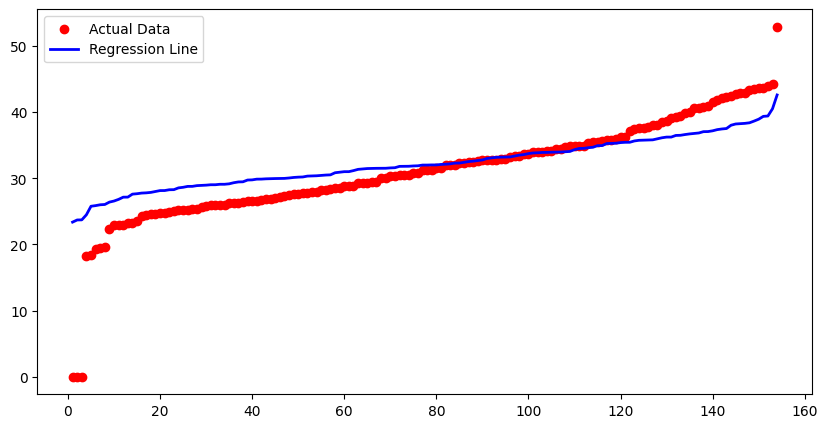

In [69]:
# 선형 회귀 시각화: 실제값 vs 예측값
plt.figure(figsize=(10, 5))
plt.scatter(range(1, y_test.shape[0]+1), sorted(y_test), color='red', label="Actual Data")
plt.plot(range(1, y_test.shape[0]+1), sorted(lr_preds), color='blue', linewidth=2, label="Regression Line")
plt.legend()
plt.show()